# Aprendizaje Automático

## Tarea 1

Grupo de trabajo:
- Manuel Calderón
- Ernesto Rivera


Primer paso: Importar las bibliotecas necesarias

In [16]:
import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from sklearn import preprocessing
import torch as torch

Siguiente paso: Leer los datos del archivo, que está separado por comas.

In [2]:
# cargar dataframe
df = pd.read_csv("daily-min-temperatures.txt", delimiter=",")
print(df)

            Date  Temp
0     1981-01-01  20.7
1     1981-01-02  17.9
2     1981-01-03  18.8
3     1981-01-04  14.6
4     1981-01-05  15.8
...          ...   ...
3645  1990-12-27  14.0
3646  1990-12-28  13.6
3647  1990-12-29  13.5
3648  1990-12-30  15.7
3649  1990-12-31  13.0

[3650 rows x 2 columns]


In [3]:
# analizar los datos
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


A continuación se aplicará un grafico de los datos de acuerdo a sus fechas.

In [25]:
# convertir las fechas de string a datetime para poder graficarlas
fechas = [ datetime.datetime.strptime(dt_string, '%Y-%m-%d') for dt_string in  df["Date"] ]

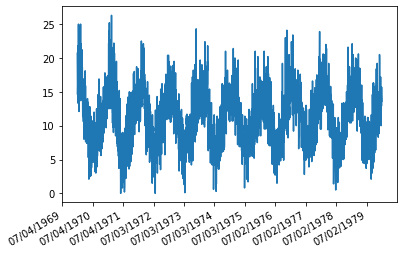

In [30]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
plt.plot(df["Date"],df["Temp"])
plt.gcf().autofmt_xdate()
plt.show()

In [5]:
# necesita hacer "reshape" para que transforme de 
# - arreglo de n [20.7000, 17.9000 ...]
# - a matriz de nx1 [[20.7000], [17.9000], ...]] 
temperatura = torch.tensor(df["Temp"]).reshape(-1, 1)
temperatura

tensor([[20.7000],
        [17.9000],
        [18.8000],
        ...,
        [13.5000],
        [15.7000],
        [13.0000]], dtype=torch.float64)

In [6]:
# Método de gráficado

def plt_data(val_x, val_y, title):
    plt.figure(figsize=(7,7))
    plt.scatter(x=val_x,y=val_y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

Siguientes pasos:
1. normalizar los datos
1. estandarizar los datos

## 1. Normalización

### Usando procedimiento automático

In [7]:
normalizador = preprocessing.MinMaxScaler()
normalizador.fit(temperatura)
normalizadaAutomatica = normalizador.transform(temperatura)
print(normalizadaAutomatica)

[[0.78707224]
 [0.68060837]
 [0.7148289 ]
 ...
 [0.51330798]
 [0.59695817]
 [0.49429658]]


Gráfico del procedimiento

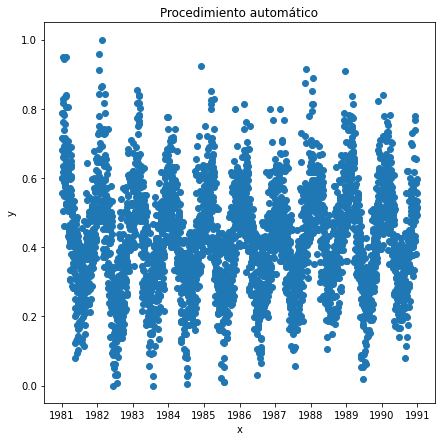

In [26]:
plt_data(fechas, normalizadaAutomatica, 'Procedimiento automático')

### Usando procedimiento manual
Se usa la fórmula
$$
\frac{valor - mínimo}{máximo - mínimo}
$$

In [9]:
# normalizar
normalizadaManual = (temperatura-temperatura.min()) / (temperatura.max()-temperatura.min())
normalizadaManual

tensor([[0.7871],
        [0.6806],
        [0.7148],
        ...,
        [0.5133],
        [0.5970],
        [0.4943]], dtype=torch.float64)

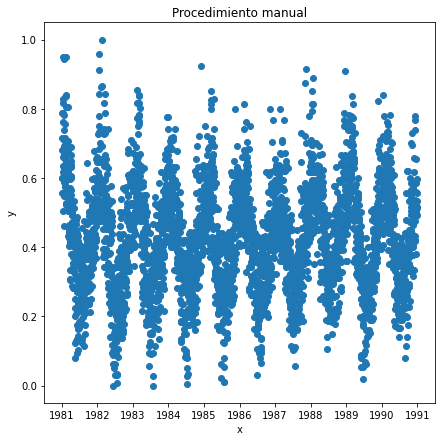

In [29]:
plt_data(fechas, normalizadaManual, 'Procedimiento manual')

## 2. Estandarización

### Usando procedimiento automático

In [11]:
# estándar automática
scaler = preprocessing.StandardScaler()
scaler.fit(temperatura)
estandarAutomatica = scaler.transform(temperatura)
estandarAutomatica

array([[2.33888328],
       [1.65113873],
       [1.87219948],
       ...,
       [0.5703973 ],
       [1.11076801],
       [0.44758577]])

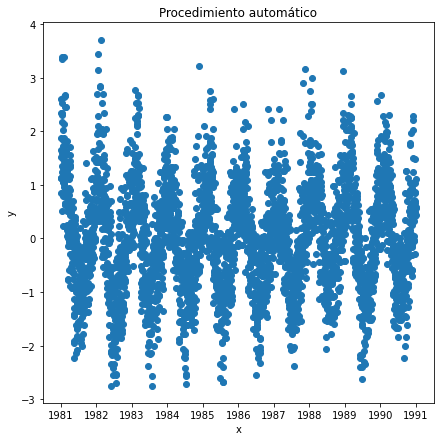

In [27]:
plt_data(fechas, estandarAutomatica, 'Procedimiento automático')

### Usando procedimiento manual
Se usa la fórmula
$$
\frac{valor - media}{\text{desviación estándar}}
$$

In [13]:
# estándar manual
estandarManual = (temperatura - temperatura.mean()) / temperatura.std()
estandarManual

tensor([[2.3386],
        [1.6509],
        [1.8719],
        ...,
        [0.5703],
        [1.1106],
        [0.4475]], dtype=torch.float64)

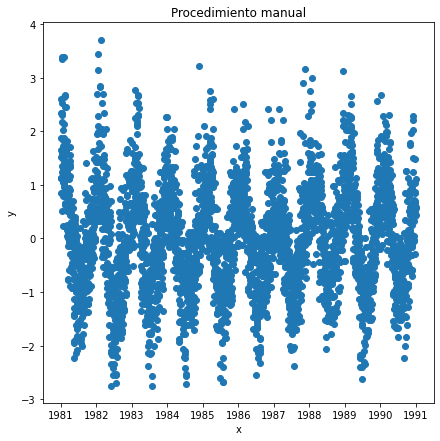

In [28]:
plt_data(fechas, estandarManual, 'Procedimiento manual')